In [ ]:
#read in data from txt file in to Numpy
#plot graph
#exstract the parts needed
#plot both graphs in the same figure
#minus off background signal
#plot bubble response graph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Header line 1: LECROYMAUI,0,Waveform

Header line 2: Segments,1,SegmentSize,100002

Header line 3: Segment,TrigTime,TimeSinceSegment1

Header line 4: #1,23-Feb-2022 15:53:23,0                 

Header line 5: Time,Ampl

Header line 1: LECROYMAUI,0,Waveform

Header line 2: Segments,1,SegmentSize,100002

Header line 3: Segment,TrigTime,TimeSinceSegment1

Header line 4: #1,23-Feb-2022 15:54:42,0                 

Header line 5: Time,Ampl



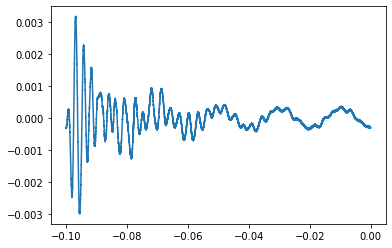

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fpath1 = "/content/drive/MyDrive/2022Experiments/lab230222-00005_C1.txt"
fpath2 = "/content/drive/MyDrive/2022Experiments/lab230222-00006_C1.txt"

x = []
y = []
x1 = []
y1 = []
with open(fpath1) as f:
    contents = f.readlines()
    for i in range(5):
      print("Header line {}: {}".format(i+1,contents[i]))
    for line in contents[5:50000]:
      data = line.split(",")
      x.append(float(data[0]))
      y.append(float(data[1]))

with open(fpath2) as f:
    contents = f.readlines()
    for i in range(5):
      print("Header line {}: {}".format(i+1,contents[i]))
    for line in contents[5:50000]:
      data = line.split(",")
      x1.append(float(data[0]))
      y1.append(float(data[1]))

#plt.plot(x,y)
#plt.plot(x1,y1)
y2 = np.array(y) - np.array(y1)
plt.plot(x,y2)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/scipy/signal/_peak_finding.py:264: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


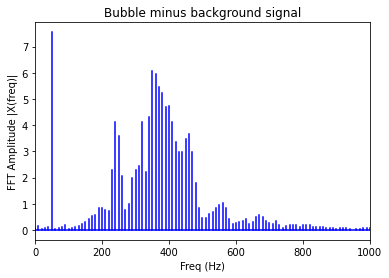

In [ ]:
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

sr= 49995/0.10
Y = fft(y2)
N = len(Y)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.stem(freq, np.abs(Y), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('Bubble minus background signal')
plt.xlim(0, 1000)

#Find peaks
peaks = find_peaks(Y, height = 3, threshold = 1, distance = 1)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = freq[peaks[0]]   #list containing the positions of the peaks  

In [ ]:
print("Peak Ampl:",height)
print("Corresponding Freq:",peak_pos)

Peak Ampl: [3.98435174 6.05890239 6.05890239 3.98435174]
Corresponding Freq: [3.2000e+02 3.5000e+02 4.9960e+05 4.9963e+05]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


(0.0, 1000.0)

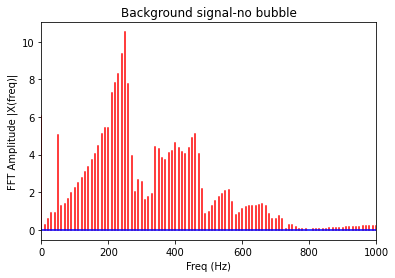

In [ ]:
from scipy.fftpack import fft, ifft

sr= 49995/0.10
Y = fft(y1)
N = len(Y)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.stem(freq, np.abs(Y), 'r', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('Background signal-no bubble')
plt.xlim(0, 1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(0.0, 1000.0)

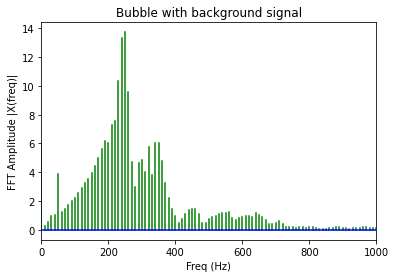

In [ ]:
sr= 49995/0.10
Y = fft(y)
N = len(Y)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.stem(freq, np.abs(Y), 'g', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('Bubble with background signal')
plt.xlim(0, 1000)